In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib as plt
import datetime

In [2]:
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [3]:
data_confirmed = pd.read_csv(confirmed_url)
data_deaths = pd.read_csv(deaths_url)

In [4]:
data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,7,7,11,16,21,22,22,22,24,24
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,23,33,38,42,51,55,59,64,70,76
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,24,26,37,48,54,60,74,87,90,139
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,2,39,39,53,75,88
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2


In [5]:
data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1,1,1,1,1,1,2,2,2,2
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1,2,3,4,4,4,7,9,11,15
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data_argentina_confirmed = data_confirmed[data_confirmed['Country/Region'] == 'Argentina']
data_argentina_deaths = data_deaths[data_deaths['Country/Region'] == 'Argentina']

In [7]:
data_argentina_confirmed

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,19,31,34,45,56,68,79,97,128,158


In [8]:
data_argentina_deaths

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,1,2,2,2,2,2,2,3,3,4


In [9]:
del data_argentina_confirmed['Lat']
del data_argentina_confirmed['Long']
del data_argentina_confirmed['Province/State']

del data_argentina_deaths['Lat']
del data_argentina_deaths['Long']
del data_argentina_deaths['Province/State']

In [10]:
data_argentina_confirmed.rename(columns={'Country/Region':'Date'}, inplace=True)
data_argentina_deaths.rename(columns={'Country/Region':'Date'}, inplace=True)

In [11]:
data_argentina_confirmed = data_argentina_confirmed.T
data_argentina_deaths = data_argentina_deaths.T

In [12]:
data_argentina_confirmed.head()

,6
Date,Argentina
1/22/2020,0
1/23/2020,0
1/24/2020,0
1/25/2020,0


In [13]:
data_argentina_confirmed.columns = data_argentina_confirmed.iloc[0]
data_argentina_deaths.columns = data_argentina_deaths.iloc[0]

In [14]:
data_argentina_confirmed = data_argentina_confirmed.iloc[1:]
data_argentina_deaths = data_argentina_deaths.iloc[1:]

In [15]:
data_argentina_confirmed.rename(columns={'Argentina':'Total'}, inplace=True)
data_argentina_deaths.rename(columns={'Argentina':'Total'}, inplace=True)

In [16]:
data_argentina_confirmed.drop(data_argentina_confirmed[data_argentina_confirmed.index < '3/1/2020'].index, inplace=True)
data_argentina_deaths.drop(data_argentina_deaths[data_argentina_deaths.index < '3/1/2020'].index, inplace=True)

In [17]:
data_argentina_confirmed.index=pd.to_datetime(data_argentina_confirmed.index.astype(str), format='%m/%d/%Y')
data_argentina_deaths.index=pd.to_datetime(data_argentina_deaths.index.astype(str), format='%m/%d/%Y')

In [18]:
data_argentina_confirmed.head()

Date,Total
2020-03-01,0
2020-03-02,0
2020-03-03,1
2020-03-04,1
2020-03-05,1


In [19]:
data_argentina_deaths.head()

Date,Total
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,0
2020-03-05,0


In [20]:
data_argentina = pd.merge(data_argentina_confirmed, data_argentina_deaths, left_index=True, right_index=True, suffixes=('ConfirmedCases', 'DeathCases'))

In [21]:
data_argentina

Date,TotalConfirmedCases,TotalDeathCases
2020-03-01,0,0
2020-03-02,0,0
2020-03-03,1,0
2020-03-04,1,0
2020-03-05,1,0
2020-03-06,2,0
2020-03-07,8,0
2020-03-08,12,1
2020-03-09,12,1
2020-03-10,17,1


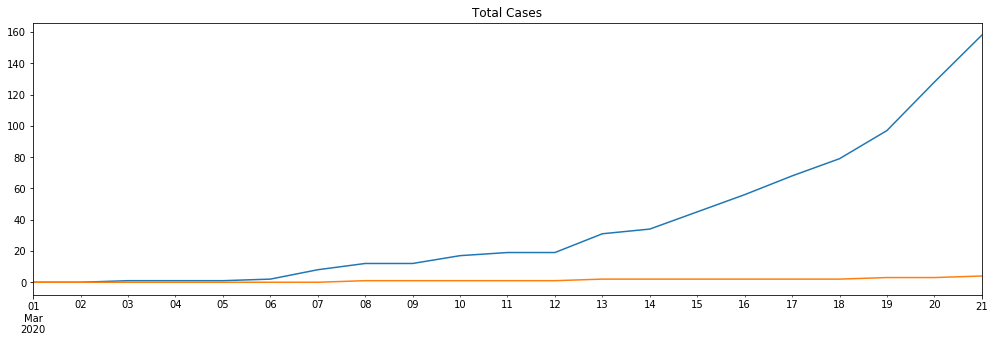

In [22]:
data_argentina.TotalConfirmedCases.plot(figsize=(17, 5), title="Total Cases")
data_argentina.TotalDeathCases.plot(figsize=(17, 5))

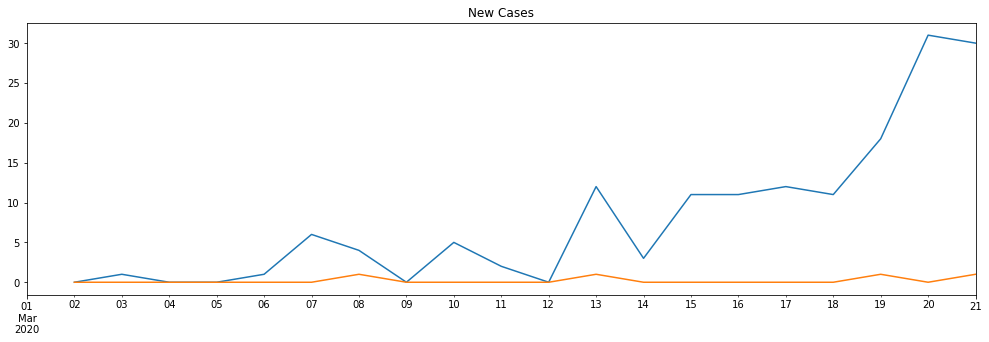

In [23]:
(data_argentina.TotalConfirmedCases - data_argentina.TotalConfirmedCases.shift(1)).plot(figsize=(17, 5), title="New Cases")
(data_argentina.TotalDeathCases - data_argentina.TotalDeathCases.shift(1)).plot(figsize=(17, 5))